# 🚫 WORK IN PROGRESS 🚫 Example of usage with price elasticity

## Load and process

First, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_top_down,
    models_energy_without_fuel_effect,
    models_offset,
    models_climate_simple_gwpstar,
    models_sustainability,
    models_energy_cost_simple,
    models_operation_cost_top_down,
    models_cost_feedback,
)

import gemseo as gm

gm.configure_logger()

<RootLogger root (INFO)>

In [2]:
models_traffic.pop("rpk")

models_operation_cost_top_down.pop("passenger_aircraft_total_cost_and_airfare")


models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down": models_efficiency_top_down,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
    "models_energy_cost_simple": models_energy_cost_simple,
    "models_operation_cost_top_down": models_operation_cost_top_down,
    "models_cost_feedback": models_cost_feedback,
}

In [3]:
process = create_process(
    configuration_file="data_elasticity/config_elasticity.json",
    models=models,
)

## Set up variables

### Aviation scenario

In [4]:
process.parameters.price_elasticity = -0.9

In [5]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [3.0]

In [6]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89.0  # 2019 value: 82.399312

In [7]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [8]:
# Aircraft energy - Introduction of alternative drop-in fuels
import numpy as np

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_share_reference_years_values = np.array([0.0, 0.0, 0.0, 0.0])
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrofuel_share_reference_years_values = np.array([0.0, 0.0, 80.0, 0.0])

In [9]:
# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 0.7, 0.7, 0.7]
process.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 3.8, 3.8, 3.8]
process.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 76.3, 76.3, 76.3]
process.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 7.4, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electricity_emission_factor_reference_years_values = [429.0, 180.0, 75.0, 30.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 50, 100, 100]
process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_share_reference_years_values = [71, 50, 0, 0]

In [10]:
# Cost parameters

## Carbon tax
process.parameters.carbon_tax_reference_years = [2020, 2030, 2040, 2050]
process.parameters.carbon_tax_reference_years_values = [
    15888,
    500,
    500,
    500,
]  # 2020 value differs from the value of Quinet (54 €/tCO2)

In [11]:
process.setup()
process.compute()

    INFO - 11:50:39: MDAGaussSeidel running... Normed residual = 1.00e+00 (iter. 0)
    INFO - 11:50:39: MDAGaussSeidel running... Normed residual = 4.10e+00 (iter. 1)
    INFO - 11:50:39: MDAGaussSeidel running... Normed residual = 1.19e-01 (iter. 2)
    INFO - 11:50:39: MDAGaussSeidel running... Normed residual = 5.48e-03 (iter. 3)
    INFO - 11:50:40: MDAGaussSeidel running... Normed residual = 2.83e-04 (iter. 4)
    INFO - 11:50:40: MDAGaussSeidel running... Normed residual = 1.58e-05 (iter. 5)
    INFO - 11:50:40: MDAGaussSeidel running... Normed residual = 9.32e-07 (iter. 6)
    INFO - 11:50:40: MDAGaussSeidel running... Normed residual = 5.68e-08 (iter. 7)
    INFO - 11:50:40: MDAGaussSeidel running... Normed residual = 3.53e-09 (iter. 8)
    INFO - 11:50:41: MDAGaussSeidel running... Normed residual = 2.22e-10 (iter. 9)
    INFO - 11:50:41: MDAGaussSeidel running... Normed residual = 1.41e-11 (iter. 10)


In [14]:
rpk_with_elast = process.data["vector_outputs"]["rpk_long_range"]
rpk_no_elast = process.data["vector_outputs"]["rpk_long_range_no_elasticity"]

In [15]:
rpk_with_elast / rpk_no_elast

2000    1.000000
2001    1.000000
2002    1.000000
2003    1.000000
2004    1.000000
2005    1.000000
2006    1.000000
2007    1.000000
2008    1.000000
2009    1.000000
2010    1.000000
2011    1.000000
2012    1.000000
2013    1.000000
2014    1.000000
2015    1.000000
2016    1.000000
2017    1.000000
2018    1.000000
2019    1.000000
2020    1.000000
2021    1.000000
2022    1.000000
2023    1.000000
2024    1.000000
2025    0.135522
2026    0.163045
2027    0.203609
2028    0.269712
2029    0.397646
2030    0.754490
2031    0.726529
2032    0.704267
2033    0.686689
2034    0.673034
2035    0.662715
2036    0.655258
2037    0.650259
2038    0.647369
2039    0.646287
2040    0.646764
2041    0.673001
2042    0.699199
2043    0.725250
2044    0.751065
2045    0.776566
2046    0.801679
2047    0.826326
2048    0.850425
2049    0.873891
2050    0.896634
dtype: float64

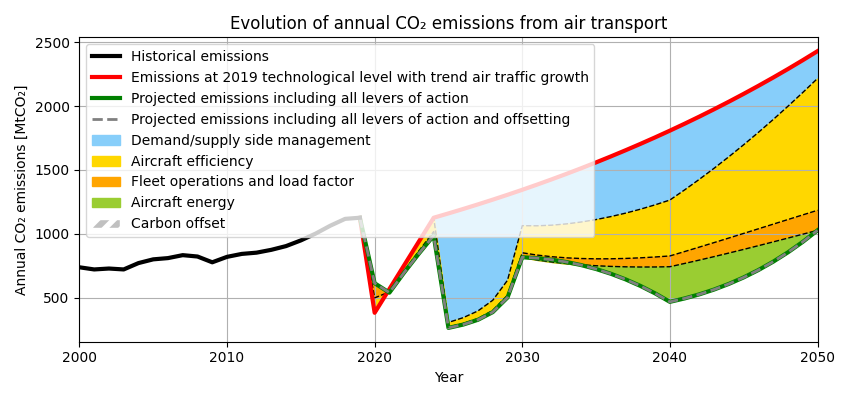

In [16]:
process.plot("air_transport_co2_emissions")

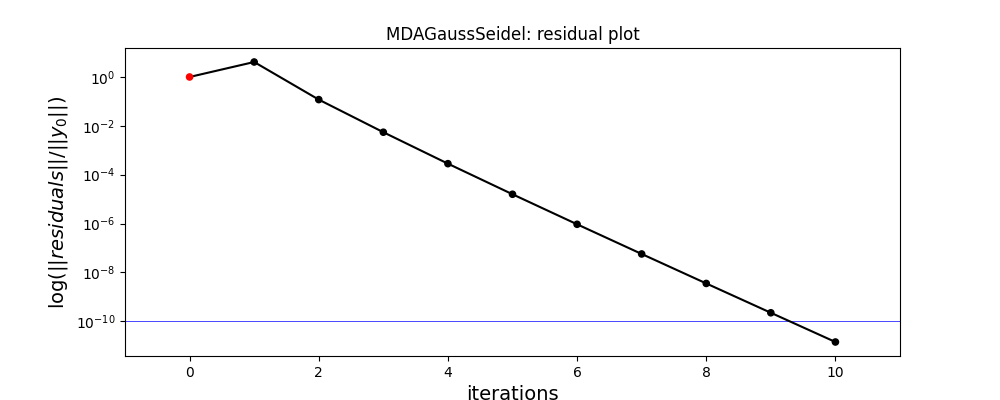

In [17]:
process.mda_chain.plot_residual_history(show=True, save=False, fig_size=(10.0, 4.0))